# Cvičení

## Vzorky vína

Pracuj se souborem [wine-regions.csv](wine-regions.csv). 

Každý záznam obsahuje informace o vzorku vína. 


In [16]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import pandas
import requests
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler


Všechny vzorky pocházejí z jednoho regionu v Itálii, ale v datech se nachází několik různých odrůd. 

Naší úlohou bude data uspořádat do shluků, které by mohly odpovídat odrůdám. 

Na začátku uvažujme, že nevíme, ke které odrůdě jednotlivé záznamy patří, a nevíme ani to, kolik odrůd v datech je.




In [17]:
X = pandas.read_csv("wine-regions.csv")

# X.describe()
# X.isna().sum()
X.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [18]:
# Normalizace dat
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [19]:
# Zobrazení výsledku normalizace
# (provizorně převedeme na DataFrame pro přehlednější zobrazení)
pandas.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874



- Proveď redukci dimenzionality na 2 dimenze. 

Vykresli data pomocí grafu. Poznáš z grafu, kolik by byl nejlepší počet shluků? 


In [20]:
# Redukce dimenzí na dvě
# (Původní data mají 13 sloupců, tzn. 13 dimenzí)

# Příprava metody TSNE
# (TSNE: T-distributed Stochastic Neighbor Embedding)
tsne = TSNE(n_components=2, random_state=42)

# Aplikace připravené TSNE na data
X = tsne.fit_transform(X)

Text(0.5, 1.0, 'Plotted data, reduced to 2 dimensions')

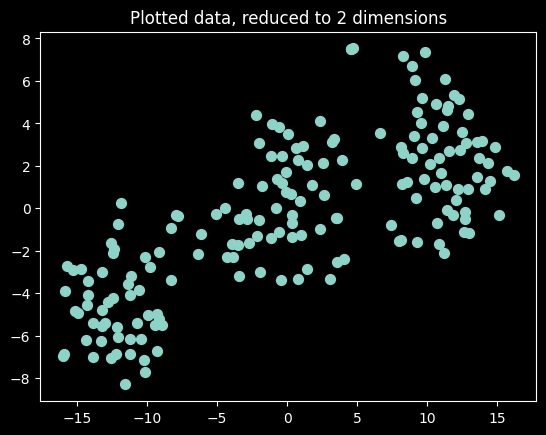

In [21]:
# Zobrazení upravených dat
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Plotted data, reduced to 2 dimensions")


Následně zkus určit metriku *inertia\** pro 2 až 10 shluků. 

Pro jaký počet shluků dochází k výraznému sníže tempa jejího poklesu? 

\**Ideální je minimalizovat vzdálenosti mezi centroidem (středem) shluku a body tohoto shluku při co nejnižším počtu shluků.*

In [36]:
# Hodnota k (počet shluků) 2-10
cluster_counts = range(2, 11)
distances = []

# Pro všechny hodnoty k...
for k in cluster_counts:
    # Provedeme K-means pro dané k
    model = KMeans(n_clusters=k, n_init="auto").fit(X)
    model.fit(X)
    # Uložíme metriku inertia pro dané k
    distances.append(model.inertia_)

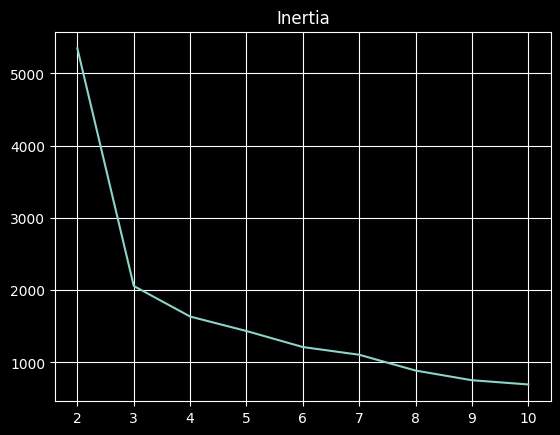

In [37]:
# Zobrazení všech hodnot inertia
plt.plot(cluster_counts, distances)
plt.title("Inertia")
plt.grid()

# Optimální počet jsou podle grafu tři shluky.
# Vyšší hodnoty nepřináší výrazné snížení hodnoty inertia.


Následně pro tento počet vykresli graf včetně centroidů.


In [24]:
# Můžeme spustit algoritmus K-means.
model = KMeans(n_clusters=3, random_state=42, n_init="auto")
labels = model.fit_predict(X)

Text(0.5, 1.0, 'Clustered data')

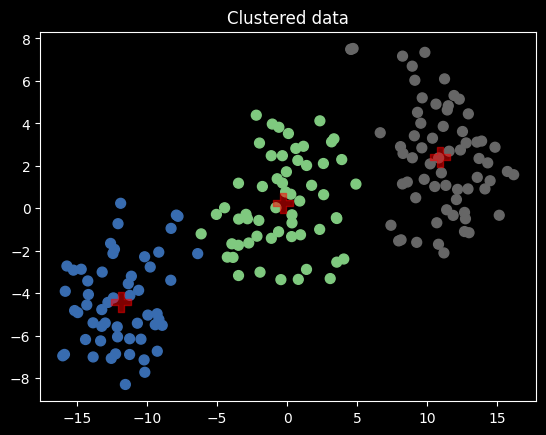

In [25]:
# Vykreslení bodů (barva podle příslušnosti ke clusteru)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap="Accent")
# parametr s nastavuje velikost bodu
# parametr cmap nastavuje "colormap" - výběr barviček zde: https://matplotlib.org/stable/tutorials/colors/colormaps.html

# Vykreslení centroidů každého clusteru
centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c="red", marker="P", s=200, alpha=0.5)
# parametr alpha nastavuje průhlednost
# parametr marker nastavuje tvar značky
plt.title("Clustered data")

Redukce dimenzionality není nutná. 

Zkus nyní znovu načíst data a vykresli graf metriky *inertia* pro 1 až 10 shluků na datech s původní dimenzí. 

Změnil se graf nějak výrazně? Změnilo by to tvé rozhodnutí o počtu shluků?


In [29]:
X2 = pandas.read_csv("wine-regions.csv")

# Normalizace dat
scaler2 = StandardScaler()
X2 = scaler2.fit_transform(X2)

# Hodnota k (počet shluků) 2-10
cluster_counts2 = range(1, 11)
distances2 = []

# Pro všechny hodnoty k...
for k in cluster_counts2:
    # Provedeme K-means pro dané k
    model2 = KMeans(n_clusters=k, n_init="auto").fit(X2)
    model2.fit(X2)
    # Uložíme metriku inertia pro dané k
    distances2.append(model2.inertia_)

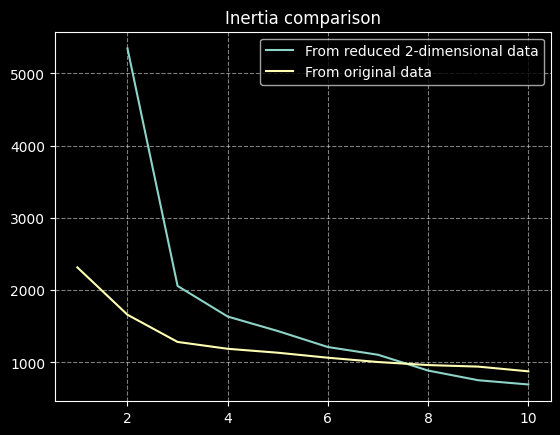

In [40]:
# Zobrazení všech hodnot inertia z původních i redukovaných dat pro porovnání
plt.plot(cluster_counts, distances, label="From reduced 2-dimensional data")
plt.plot(cluster_counts2, distances2, label="From original data")
plt.legend(loc="best", bbox_to_anchor=(1, 1))
plt.title("Inertia comparison")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

In [ ]:
# Absolutní hodnoty vychází jinak (vzhledem k výrazně jinému počtu dimenzí), ale tvar zůstává podobný ->
# Tři shluky se zdají být v obou variantách optimální volbou.

---


### Bonus

Další metrikou, kterou můžeme využít, je takzvaný _Silhouette_ koeficient. Ten měří průměrnou vzdálenost mezi bodem a všemi body, které jsou ve stejném shluku, a pak vzdálenost mezi bodem a všemi body v nejbližším jiném shluku.

Jeho hodnota se nachází mezi 1 a -1. Čím vyšší je tento koeficient, tím lépe definované jsou clustery (body se nachází blízko svému shluku a daleko od všech ostatních). Pokud má hodnotu kolem nuly, značí to, že se naše shluky překrývají (existují body na rozhraní dvou shluků). Záporná hodnota značí, že body z odlišných shluků jsou si blíže než body ze stejných shluků.

Hodnotu koeficientu zjisíš pomocí funkce `silhouette_score()`. Příklad volání funkce je níže.

```py
silhouette_score(X, labels)
```

Vytvoř graf hodnoty koeficientu pro 2 až 10 shluků. V jakém případě je hodnota koeficientu nejvyšší?

In [41]:
cluster_counts3 = range(2, 11)
scores = []

for k in cluster_counts3:
    # Provedeme K-means pro dané k
    model3 = KMeans(n_clusters=k, n_init="auto").fit(X)
    labels3 = model3.fit_predict(X)
    # Spočítáme a uložíme silhouette skóre pro dané k
    scores.append(silhouette_score(X, labels3))

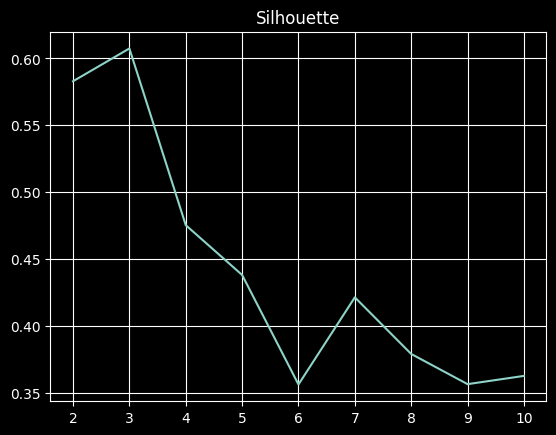

In [42]:
# Zobrazení všech hodnot silhoutte
plt.plot(cluster_counts3, scores)
plt.title("Silhouette")
plt.grid()

---

## Reading list

Nehierarchické shlukování
  - Vysvětlení K-means clustering: [StatQuest: K-means clustering](https://www.youtube.com/watch?v=4b5d3muPQmA)
  - (Bonus) Vysvětlení shlukování metodou DBSCAN: [Clustering with DBSCAN, Clearly Explained!!!](https://www.youtube.com/watch?v=RDZUdRSDOok)
  
Hierarchické shlukování
- [StatQuest: Hierarchical Clustering](https://www.youtube.com/watch?v=7xHsRkOdVwo)

**Inertia**

[Clustering: How to Find Hyperparameters using Inertia](https://towardsdatascience.com/clustering-how-to-find-hyperparameters-using-inertia-b0343c6fe819)